In [11]:
from prototype import TrafficEnvironment, CustomEngine
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import numpy as np
config_path = 'configs/config.json'
env = TrafficEnvironment(2, False, config_path, thread_num=4)

Controlling intersection intersection_3_2 with RL.


In [4]:
for intersection in env.map.get_intersections():
    id = intersection["id"]
    env.eng.set_tl_phase(id, 0)

for i in range(300):
    env.eng.next_step()

[warning] Invalid route 'flow_12'. Omitted by default.
[warning] Invalid route 'flow_10'. Omitted by default.


In [19]:
# Get an intersection id
int_id = list(env.map.intersection_dict.keys())[0] # intersection_1_1

print(env.map.intersection_dict[int_id]["phases"])

print(env.map.intersection_dict[int_id]["phases_links"])

# print(env.map.intersection_dict[int_id]["roadLinks"][0]["laneLinks"][0].keys())

{0: [0, 2, 3, 6, 7, 10], 1: [10, 2, 3, 6], 2: [1, 2, 3, 6, 8, 10], 3: [10, 2, 3, 6], 4: [2, 3, 4, 6, 10, 11], 5: [10, 2, 3, 6], 6: [2, 3, 5, 6, 9, 10], 7: [10, 2, 3, 6]}
{0: [{'type': 'go_straight', 'startRoad': 'road_0_1_0', 'endRoad': 'road_1_1_0', 'direction': 0}, {'type': 'turn_right', 'startRoad': 'road_0_1_0', 'endRoad': 'road_1_1_3', 'direction': 0}, {'type': 'turn_right', 'startRoad': 'road_1_0_1', 'endRoad': 'road_1_1_0', 'direction': 1}, {'type': 'turn_right', 'startRoad': 'road_2_1_2', 'endRoad': 'road_1_1_1', 'direction': 2}, {'type': 'go_straight', 'startRoad': 'road_2_1_2', 'endRoad': 'road_1_1_2', 'direction': 2}, {'type': 'turn_right', 'startRoad': 'road_1_2_3', 'endRoad': 'road_1_1_2', 'direction': 3}], 1: [{'type': 'turn_right', 'startRoad': 'road_1_2_3', 'endRoad': 'road_1_1_2', 'direction': 3}, {'type': 'turn_right', 'startRoad': 'road_0_1_0', 'endRoad': 'road_1_1_3', 'direction': 0}, {'type': 'turn_right', 'startRoad': 'road_1_0_1', 'endRoad': 'road_1_1_0', 'direct

In [ ]:
from collections import Counter
temp = []
for lst in env.map.intersection_dict["intersection_2_2"]["phase_incoming_lanes"].values():
    temp.extend(lst)
Counter(temp), env.map.intersection_dict["intersection_2_2"]["phase_incoming_lanes"]

In [19]:
env = TrafficEnvironment(2, False, config_path, thread_num=4)
done = False
obs = env.reset()
model = PPO("MlpPolicy", env, verbose=1)
model.load("ppo_trained.zip")
while True:
    obs, reward, done, info = env.step(model.predict(obs)[0])
    print(env.eng.get_average_travel_time(), reward)
    if done:
        print("done")
        break

Controlling intersection intersection_1_2 with RL.
Controlling intersection intersection_1_2 with RL.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
1.0 -2
2.0 -2
3.0 -2
4.0 -2
3.0 -4
4.0 -4
5.0 -4
6.0 -4
5.0 -6
6.0 -6
7.0 -6
8.0 -6
7.0 -8
8.0 -8
9.0 -8
10.0 -8
9.0 -10
10.0 -10
11.0 -10
12.0 -10
11.0 -11
12.0 -11
13.0 -11
14.0 -8
13.0 -10
14.0 -9
15.0 -9
16.0 -9
15.0 -10
16.0 -10
17.0 -10
18.0 -10
17.0 -9
18.0 -9
19.0 -6
20.0 -6
19.0 -8
20.0 -8
21.0 -8
22.0 -8
21.0 -13
22.0 -13
23.0 -12
24.0 -12
23.0 -14
24.0 -14
25.0 -13
26.0 -14
25.0 -16
26.0 -14
27.0 -14
28.0 -12
27.0 -14
28.0 -15
29.0 -15
30.0 -16
29.0 -18
30.0 -19
31.0 -18
32.0 -19
31.0 -21
32.0 -22
32.994791666666664 -20
33.989583333333336 -20
32.98529411764706 -21
33.98039215686274 -15
34.97549019607843 -14


[warning] Invalid route 'flow_12'. Omitted by default.
[warning] Invalid route 'flow_10'. Omitted by default.


35.970588235294116 -8
34.967592592592595 -10
35.96296296296296 -9
36.958333333333336 -7
37.9537037037037 -7
36.95175438596491 -6
37.94736842105263 -1
38.94298245614035 -1
39.93859649122807 -2
38.9375 0
39.93333333333333 -3
40.92916666666667 -3
41.925 -6
40.92460317460318 -4
41.92063492063492 -4
42.91269841269841 -4
43.90079365079365 -2
42.89393939393939 -4
43.88257575757576 -4
44.871212121212125 -7
45.859848484848484 -8
44.85507246376812 -13
45.844202898550726 -13
46.833333333333336 -14
47.822463768115945 -14
46.81944444444444 -19
47.80902777777778 -17
48.798611111111114 -20
49.78819444444444 -20
48.78666666666667 -22
49.77333333333333 -19
50.75666666666667 -22
51.74 -16
50.73397435897436 -18
51.717948717948715 -18
52.70192307692308 -18
53.68589743589744 -18
52.6820987654321 -20
53.666666666666664 -18
54.651234567901234 -18
55.635802469135804 -18
54.63392857142857 -20
55.61904761904762 -19
56.604166666666664 -17
57.589285714285715 -14
56.589080459770116 -13
57.57183908045977 -14
58.554

In [ ]:
# intersection = env.map.intersections[0] #['roadLinks'][0]['laneLinks'][1]
# for roadlink in intersection['roadLinks']:
#     for 
# env.map.get_intersection_phase_roadlinks('intersection_1_1', 0)

movements = env.map.get_intersection_movements('intersection_1_1')
vehicle_counts = env.eng.get_lane_vehicle_count()
for p in env.map.get_intersection_phases('intersection_1_1'):
    total_cars = 0
    for m in phases[p]:
        total_cars += np.sum([vehicle_counts[l] for l in movements[m]['incoming_lanes']])
    print(p, total_cars)
# i = 6
# env.map.intersections[0]['roadLinks'][i], len(env.map.intersections[0]['roadLinks'][i]['laneLinks'])
# print()
# [x['startLaneIndex'] for x in env.map.intersections[0]['roadLinks'][0]['laneLinks']]

In [5]:
config_path = 'configs/config.json'
env_teacher = TrafficEnvironment(2, False, config_path, thread_num=1)
env_teacher.time_per_episode = 1000.0

model = PPO("MlpPolicy", env_teacher, verbose=1)
model.learn(total_timesteps=1000000)

Controlling intersection intersection_2_2 with RL.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Controlling intersection intersection_2_2 with RL.


[warning] Invalid route 'flow_12'. Omitted by default.
[warning] Invalid route 'flow_10'. Omitted by default.


Controlling intersection intersection_3_1 with RL.
Controlling intersection intersection_3_2 with RL.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -3.7e+04 |
| time/              |          |
|    fps             | 448      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
Controlling intersection intersection_3_1 with RL.
Controlling intersection intersection_2_2 with RL.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -3.68e+04   |
| time/                   |             |
|    fps                  | 421         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008542

In [6]:
model.save("ppo_trained")

In [9]:
travel_times = []
for id in env_teacher.eng.exit_times:
    travel_times.append(env_teacher.eng.entrance_times[id] - env_teacher.eng.exit_times[id])
print(np.mean(travel_times))

348.04


In [22]:
config_path = 'configs/config.json'
env_student = TrafficEnvironment(30, True, config_path, thread_num=4, )
env_student.time_per_episode = 500.0

model = PPO("MlpPolicy", env_student, verbose=1)
model.learn(total_timesteps=250000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 113       |
|    ep_rew_mean     | -1.56e+04 |
| time/              |           |
|    fps             | 258       |
|    iterations      | 1         |
|    time_elapsed    | 7         |
|    total_timesteps | 2048      |
----------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 113           |
|    ep_rew_mean          | -1.57e+04     |
| time/                   |               |
|    fps                  | 238           |
|    iterations           | 2             |
|    time_elapsed         | 17            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00080646214 |
|    clip_fraction        | 0             |
|    clip_range           | 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 112          |
|    ep_rew_mean          | -1.29e+04    |
| time/                   |              |
|    fps                  | 237          |
|    iterations           | 11           |
|    time_elapsed         | 94           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0021845375 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.03        |
|    explained_variance   | 4.46e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.78e+06     |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.0037      |
|    value_loss           | 3.53e+06     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 117         |
|    ep_rew_mean          | -8.12e+03   |
| time/                   |             |
|    fps                  | 245         |
|    iterations           | 21          |
|    time_elapsed         | 174         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.006007568 |
|    clip_fraction        | 0.0248      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.81       |
|    explained_variance   | 5.36e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 5.73e+05    |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0049     |
|    value_loss           | 1.17e+06    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 118   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 122          |
|    ep_rew_mean          | -5.53e+03    |
| time/                   |              |
|    fps                  | 240          |
|    iterations           | 31           |
|    time_elapsed         | 264          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0051887846 |
|    clip_fraction        | 0.0313       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | 1.31e-06     |
|    learning_rate        | 0.0003       |
|    loss                 | 2.13e+05     |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00473     |
|    value_loss           | 4.4e+05      |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 122         |
|    ep_rew_mean          | -5.09e+03   |
| time/                   |             |
|    fps                  | 231         |
|    iterations           | 41          |
|    time_elapsed         | 362         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.011703075 |
|    clip_fraction        | 0.0345      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 4.17e-07    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.05e+05    |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.00587    |
|    value_loss           | 3.81e+05    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 122 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 124          |
|    ep_rew_mean          | -4.7e+03     |
| time/                   |              |
|    fps                  | 229          |
|    iterations           | 51           |
|    time_elapsed         | 454          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0096407635 |
|    clip_fraction        | 0.0742       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.5         |
|    explained_variance   | 2.98e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.92e+05     |
|    n_updates            | 500          |
|    policy_gradient_loss | -0.0107      |
|    value_loss           | 4.2e+05      |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 125        |
|    ep_rew_mean          | -4.52e+03  |
| time/                   |            |
|    fps                  | 225        |
|    iterations           | 61         |
|    time_elapsed         | 553        |
|    total_timesteps      | 124928     |
| train/                  |            |
|    approx_kl            | 0.01019701 |
|    clip_fraction        | 0.0211     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.48      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0003     |
|    loss                 | 1.45e+05   |
|    n_updates            | 600        |
|    policy_gradient_loss | -0.00396   |
|    value_loss           | 3.1e+05    |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 125         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 125         |
|    ep_rew_mean          | -4.8e+03    |
| time/                   |             |
|    fps                  | 222         |
|    iterations           | 71          |
|    time_elapsed         | 654         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.008210607 |
|    clip_fraction        | 0.0178      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.46       |
|    explained_variance   | 2.38e-07    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.94e+05    |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.00307    |
|    value_loss           | 3.41e+05    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 125   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 127        |
|    ep_rew_mean          | -4.95e+03  |
| time/                   |            |
|    fps                  | 219        |
|    iterations           | 81         |
|    time_elapsed         | 756        |
|    total_timesteps      | 165888     |
| train/                  |            |
|    approx_kl            | 0.01139521 |
|    clip_fraction        | 0.0166     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.42      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0003     |
|    loss                 | 1.66e+05   |
|    n_updates            | 800        |
|    policy_gradient_loss | -0.00418   |
|    value_loss           | 3.2e+05    |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 127         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 127         |
|    ep_rew_mean          | -5.01e+03   |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 91          |
|    time_elapsed         | 857         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.008673796 |
|    clip_fraction        | 0.0455      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 1.27e+05    |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.00913    |
|    value_loss           | 2.87e+05    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 126 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 127         |
|    ep_rew_mean          | -4.46e+03   |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 101         |
|    time_elapsed         | 955         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.009473279 |
|    clip_fraction        | 0.0118      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 1.19e-07    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.06e+05    |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.00417    |
|    value_loss           | 1.83e+05    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 127   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 125          |
|    ep_rew_mean          | -4.26e+03    |
| time/                   |              |
|    fps                  | 215          |
|    iterations           | 111          |
|    time_elapsed         | 1053         |
|    total_timesteps      | 227328       |
| train/                  |              |
|    approx_kl            | 0.0044416264 |
|    clip_fraction        | 0.0268       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.04e+05     |
|    n_updates            | 1100         |
|    policy_gradient_loss | -0.00663     |
|    value_loss           | 2e+05        |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 125         |
|    ep_rew_mean          | -4.62e+03   |
| time/                   |             |
|    fps                  | 214         |
|    iterations           | 121         |
|    time_elapsed         | 1156        |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.009262851 |
|    clip_fraction        | 0.0538      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 7.93e+04    |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.00861    |
|    value_loss           | 1.66e+05    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 126 

In [6]:
env_teacher.average_travel_times

[0.0,
 470.2246,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386.7936,
 386

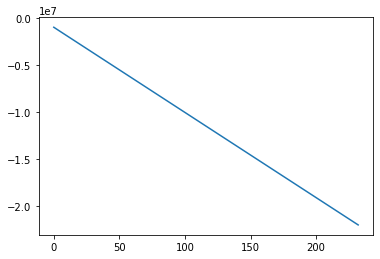

In [14]:
plt.plot(np.convolve(env_teacher.rewards, np.ones(20)/20, mode='valid'))

In [9]:
done = False
obs = env.reset()
for i in range(100):
    obs, reward, done, info = env.step(0)

In [12]:
import json
with open('configs/flow.json', 'r') as f:
    d = json.load(f)

In [3]:
env.map.roadnet['roads'][0] # ['roadLinks'][1]#['laneLinks'][7]

{'id': 'road_1_0_1',
 'points': [{'x': 0, 'y': -300}, {'x': 0, 'y': 0}],
 'lanes': [{'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67}],
 'startIntersection': 'intersection_1_0',
 'endIntersection': 'intersection_1_1',
 'lane_ids': ['road_1_0_1_0',
  'road_1_0_1_1',
  'road_1_0_1_2',
  'road_1_0_1_3',
  'road_1_0_1_4',
  'road_1_0_1_5',
  'road_1_0_1_6']}

In [19]:
vehicle_distances = env.eng.get_vehicle_distance()
print(max(vehicle_distances.values()))
vehicle_counts = {}
for lane, vehicles in env.eng.get_lane_vehicles().items():
    vehicle_counts[lane] = 0
    lane_info = env.map.get_lane_loc_info(lane)
    for vehicle in vehicles:
        if lane_info['sensor_start'] < vehicle_distances[vehicle] < lane_info['sensor_end']:
            vehicle_counts[lane] = 1
vehicle_counts

269.26166666666677


KeyError: 'sensor_start'

True

In [56]:
env.map.roadnet['roads'][1]

{'id': 'road_0_1_0',
 'points': [{'x': -300, 'y': 0}, {'x': 0, 'y': 0}],
 'lanes': [{'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67},
  {'width': 4, 'maxSpeed': 16.67}],
 'startIntersection': 'intersection_0_1',
 'endIntersection': 'intersection_1_1',
 'lane_ids': ['road_0_1_0_0',
  'road_0_1_0_1',
  'road_0_1_0_2',
  'road_0_1_0_3',
  'road_0_1_0_4',
  'road_0_1_0_5',
  'road_0_1_0_6']}

array([-300.,   -2.])

In [6]:
# done = False
# obs = env.reset()
# entrance_times = {}
# exit_times = {}
# while not done:
#     ids = set(env.eng.get_vehicles(include_waiting=True))
#     for id in ids:
#         if id not in entrance_times:
#             entrance_times[id] = env.eng.get_current_time()
#     for id in entrance_times:
#         if id not in ids and id not in exit_times:
#             exit_times[id] = env.eng.get_current_time()
#     print(np.mean([exit_times.get(id, env.eng.get_current_time() + 1.0) - entrance_times[id] for id in entrance_times]), \
#           np.mean([exit_times[id] - entrance_times[id] for id in exit_times]),
#           env.eng.get_average_travel_time())
#     obs, reward, done, info = env.step(0)

In [14]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 111       |
|    ep_rew_mean     | -1.68e+04 |
| time/              |           |
|    fps             | 269       |
|    iterations      | 1         |
|    time_elapsed    | 7         |
|    total_timesteps | 2048      |
----------------------------------


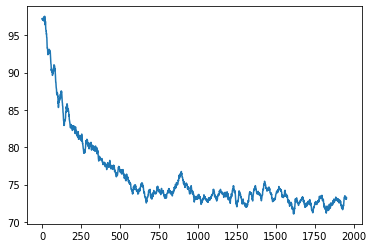

In [5]:
plt.plot(np.convolve(env.average_travel_times[100:], np.ones(20)/20, mode='valid'))

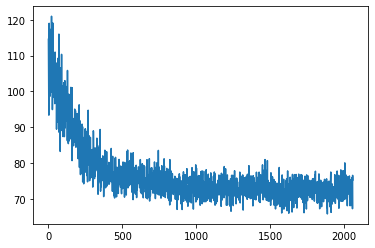

In [6]:
plt.plot(env.average_travel_times[1:])

In [119]:
roadlink = env.map.get_intersection_info('intersection_1_1')['roadLinks'][0]
start_lanes_indices = list(set([l['startLaneIndex'] for l in roadlink['laneLinks']]))
start_lane_ids = [f"{roadlink['startRoad']}_{i}" for i in start_lanes_indices]
end_lanes_indices = list(set([l['endLaneIndex'] for l in roadlink['laneLinks']]))
end_lane_ids = [f"{roadlink['endRoad']}_{i}" for i in start_lanes_indices]
movement = {'incoming_lanes': start_lane_ids, 'outgoing_lanes': end_lane_ids, 'type': roadlink['type']}

# print(env.map.get_intersection_info('intersection_1_1')['roadLinks'][0]['endRoad'])

['road_0_1_0_2', 'road_0_1_0_3', 'road_0_1_0_4'] ['road_1_1_0_2', 'road_1_1_0_3', 'road_1_1_0_4']


In [121]:
roadlink['type']

'go_straight'

In [10]:
env.map.get_intersection_info('intersection_1_1')['roadLinks'][0]

{'type': 'go_straight',
 'startRoad': 'road_0_1_0',
 'endRoad': 'road_1_1_0',
 'direction': 0,
 'laneLinks': [{'startLaneIndex': 2,
   'endLaneIndex': 0,
   'points': [{'x': -30, 'y': -10},
    {'x': -26.16, 'y': -9.775999999999998},
    {'x': -20.88, 'y': -9.168000000000001},
    {'x': -14.52, 'y': -8.272},
    {'x': -7.439999999999998, 'y': -7.183999999999999},
    {'x': 0, 'y': -6},
    {'x': 7.440000000000009, 'y': -4.815999999999999},
    {'x': 14.519999999999992, 'y': -3.7280000000000006},
    {'x': 20.880000000000006, 'y': -2.831999999999999},
    {'x': 26.16, 'y': -2.224},
    {'x': 30, 'y': -2}]},
  {'startLaneIndex': 2,
   'endLaneIndex': 1,
   'points': [{'x': -30, 'y': -10},
    {'x': -26.16, 'y': -9.887999999999998},
    {'x': -20.88, 'y': -9.584000000000001},
    {'x': -14.52, 'y': -9.136},
    {'x': -7.439999999999998, 'y': -8.591999999999999},
    {'x': 0, 'y': -8},
    {'x': 7.440000000000009, 'y': -7.4079999999999995},
    {'x': 14.519999999999992, 'y': -6.86400000000

In [61]:
main_intersection = env.roadnet['intersections'][2]
print(main_intersection.keys(), end='\n\n')
print(f"main_intersection[id] = {main_intersection['id']}", end='\n\n')
print(f"main_intersection[point] = {main_intersection['point']}", end='\n\n')
print(f"main_intersection[width] = {main_intersection['width']}", end='\n\n')
print(f"main_intersection[roads] = {main_intersection['roads']}", end='\n\n')
print(f"main_intersection[trafficLight] = {main_intersection['trafficLight']}", end='\n\n')

dict_keys(['id', 'point', 'width', 'roads', 'roadLinks', 'trafficLight', 'virtual'])

main_intersection[id] = intersection_1_1

main_intersection[point] = {'x': 0, 'y': 0}

main_intersection[width] = 30

main_intersection[roads] = ['road_0_1_0', 'road_1_0_1', 'road_2_1_2', 'road_1_2_3', 'road_1_1_0', 'road_1_1_1', 'road_1_1_2', 'road_1_1_3']

main_intersection[trafficLight] = {'roadLinkIndices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'lightphases': [{'time': 30, 'availableRoadLinks': [0, 2, 3, 6, 7, 10]}, {'time': 5, 'availableRoadLinks': [10, 2, 3, 6]}, {'time': 30, 'availableRoadLinks': [1, 2, 3, 6, 8, 10]}, {'time': 5, 'availableRoadLinks': [10, 2, 3, 6]}, {'time': 30, 'availableRoadLinks': [2, 3, 4, 6, 10, 11]}, {'time': 5, 'availableRoadLinks': [10, 2, 3, 6]}, {'time': 30, 'availableRoadLinks': [2, 3, 5, 6, 9, 10]}, {'time': 5, 'availableRoadLinks': [10, 2, 3, 6]}]}



In [17]:
len(main_intersection['roadLinks'])

12

In [49]:
roadlink = main_intersection['roadLinks'][1]
print(roadlink.keys(), end='\n\n')
for k in roadlink.keys():
    if k != 'laneLinks':
        print(f'roadlink[{k}] = {roadlink[k]}')

dict_keys(['type', 'startRoad', 'endRoad', 'direction', 'laneLinks'])

roadlink[type] = turn_left
roadlink[startRoad] = road_0_1_0
roadlink[endRoad] = road_1_1_1
roadlink[direction] = 0


In [50]:
print(len(roadlink['laneLinks']))
lanelink = roadlink['laneLinks'][4]
print(lanelink.keys(), end='\n\n')
for k in lanelink.keys():
    print(f'lanelink[{k}] = {lanelink[k]}')

14
dict_keys(['startLaneIndex', 'endLaneIndex', 'points'])

lanelink[startLaneIndex] = 0
lanelink[endLaneIndex] = 4
lanelink[points] = [{'x': -30, 'y': -2}, {'x': -26.226, 'y': -1.3739999999999999}, {'x': -21.168, 'y': 0.3680000000000003}, {'x': -15.222, 'y': 3.0220000000000007}, {'x': -8.783999999999997, 'y': 6.384000000000002}, {'x': -2.25, 'y': 10.25}, {'x': 3.9840000000000053, 'y': 14.416000000000004}, {'x': 9.521999999999995, 'y': 18.677999999999997}, {'x': 13.968000000000005, 'y': 22.832000000000004}, {'x': 16.926, 'y': 26.674}, {'x': 18, 'y': 30}]


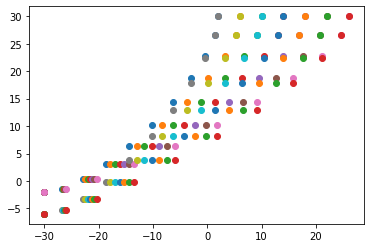

In [51]:
import matplotlib.pyplot as plt
for i in range(len(roadlink['laneLinks'])):
    lanelink = roadlink['laneLinks'][i]
    plt.scatter([d['x'] for d in lanelink['points']], [d['y'] for d in lanelink['points']])

In [56]:
env.roadnet['roads'][0].keys()

dict_keys(['id', 'points', 'lanes', 'startIntersection', 'endIntersection'])

In [59]:
print(env.roadnet['roads'][0].keys(), end='\n\n')
for k in env.roadnet['roads'][0].keys():
    print(f"env.roadnet[roads][0][{k}] = {env.roadnet['roads'][0][k]}")

dict_keys(['id', 'points', 'lanes', 'startIntersection', 'endIntersection'])

env.roadnet[roads][0][id] = road_1_0_1
env.roadnet[roads][0][points] = [{'x': 0, 'y': -300}, {'x': 0, 'y': 0}]
env.roadnet[roads][0][lanes] = [{'width': 4, 'maxSpeed': 16.67}, {'width': 4, 'maxSpeed': 16.67}, {'width': 4, 'maxSpeed': 16.67}, {'width': 4, 'maxSpeed': 16.67}, {'width': 4, 'maxSpeed': 16.67}, {'width': 4, 'maxSpeed': 16.67}, {'width': 4, 'maxSpeed': 16.67}]
env.roadnet[roads][0][startIntersection] = intersection_1_0
env.roadnet[roads][0][endIntersection] = intersection_1_1


In [24]:
lane_dict = {}
for lane in env.eng.get_lane_vehicles().keys():
    lane_dict[lane] = {}

for intersection in env.map.intersection_dict:
    for road_link in env.map.get_intersection_info(intersection)['roadLinks']:
        start_road = road_link['startRoad']
        end_road = road_link['endRoad']
        for lane_link in road_link['laneLinks']:
            start_lane = f"{start_road}_{lane_link['startLaneIndex']}"
            end_lane = f"{end_road}_{lane_link['endLaneIndex']}"
            lane_dict[start_lane]['end'] = np.array([lane_link['points'][0]['x'], lane_link['points'][0]['y']])
            lane_dict[end_lane]['start'] = np.array([lane_link['points'][-1]['x'], lane_link['points'][-1]['y']])
            
for road in env.map.roads:
    points = road['points']
    start = np.array([points[0]['x'], points[0]['y']])
    end = np.array([points[1]['x'], points[1]['y']])
    direction = end - start
    perp = np.array([-direction[1], direction[0]]) / np.linalg.norm(direction)
    if road['startIntersection'] not in env.map.intersection_dict:
        for lane_id, lane_info in zip(road['lane_ids'], road['lanes']):
            lane_index = int(lane_id.split("_")[-1])
            width = lane_info['width']
            lane_dict[lane_id]['start'] = start - perp * (lane_index + 0.5) * width
    
    if road['endIntersection'] not in env.map.intersection_dict:
        for lane_id, lane_info in zip(road['lane_ids'], road['lanes']):
            lane_index = int(lane_id.split("_")[-1])
            width = lane_info['width']
            lane_dict[lane_id]['end'] = end - perp * (lane_index + 0.5) * width

for lane in lane_dict:
    lane_dict[lane]['distance'] = np.linalg.norm(lane_dict[lane]['end'] - lane_dict[lane]['start'])